In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets

income_df = pd.read_csv('income.csv')
members_df = pd.read_csv('member.csv')
attendance_df = pd.read_csv('attendance.csv')
budget_df = pd.read_csv('budget.csv')
event_df = pd.read_csv('event.csv')
expenses_df = pd.read_csv('expense.csv')
major_df = pd.read_csv('major.csv')
zipcode_df = pd.read_csv('zip_code.csv')

In [3]:
# Going through each data set and there information by using below code
income_df.head()
income_df.info()
members_df.head()
members_df.info()
attendance_df.head()
attendance_df.info()
budget_df.head()
budget_df.info()
event_df.head()
event_df.info()
expenses_df.head()
expenses_df.info()
major_df.head()
major_df.info()
zipcode_df.head()
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income_id       36 non-null     object
 1   date_received   36 non-null     object
 2   amount          36 non-null     int64 
 3   source          36 non-null     object
 4   notes           3 non-null      object
 5   link_to_member  33 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   member_id      33 non-null     object
 1   first_name     33 non-null     object
 2   last_name      33 non-null     object
 3   email          33 non-null     object
 4   position       33 non-null     object
 5   t_shirt_size   33 non-null     object
 6   phone          33 non-null     object
 7   zi

In [4]:
# Data Cleaning and Transformation
# Handle missing values

income_df.fillna(0, inplace=True)
income_df = income_df.drop(['notes'],axis=1)
members_df.fillna(0, inplace=True)
event_df.fillna(0, inplace=True)
expenses_df.fillna(0, inplace=True)
zipcode_df.fillna(0, inplace=True)

In [5]:
zipcode_df['zip_code'] = zipcode_df['zip_code'].astype(str)
members_df['zip'] = members_df['zip'].astype(str)

In [6]:
members_major_df = pd.merge(members_df, major_df, left_on='link_to_major', right_on='major_id', how='left')

In [7]:
members_major_zip_df = pd.merge(members_major_df,zipcode_df, left_on='zip', right_on='zip_code', how='left')

In [8]:
event_attendance_df = pd.merge(event_df,attendance_df, left_on='event_id', right_on='link_to_event', how='left')

In [9]:
merged_df = pd.merge(event_attendance_df,members_major_zip_df,left_on='link_to_member', right_on='member_id', how='left')

In [10]:
merged_df = merged_df.drop(['link_to_event','link_to_member'],axis=1)

In [11]:
merged_df = pd.merge(merged_df,income_df, left_on='member_id', right_on='link_to_member', how='left')

In [12]:
merged_df = merged_df.drop(['link_to_member'],axis=1)

In [13]:
merged_df = pd.merge(merged_df,budget_df,left_on='event_id', right_on='link_to_event', how='left')

In [14]:
merged_df = merged_df.drop(['link_to_event'],axis=1)

In [15]:
merged_df = pd.merge(merged_df,expenses_df,left_on='budget_id', right_on='link_to_budget', how='left')

In [16]:
merged_df = merged_df.drop(['link_to_member','link_to_budget'],axis=1)

In [17]:
merged_df.head()

,event_id,event_name,event_date,type_x,notes,location,status,member_id,first_name,last_name,...,category,spent,remaining,amount_y,event_status,expense_id,expense_description,expense_date,cost,approved
0,rec0Si5cQ4rJRVzd6,March Meeting,2020-03-10T12:00:00,Meeting,0,MU 215,Open,NaN,NaN,NaN,...,Advertisement,0.0,55.0,55.0,Open,NaN,NaN,NaN,NaN,NaN
1,rec0Si5cQ4rJRVzd6,March Meeting,2020-03-10T12:00:00,Meeting,0,MU 215,Open,NaN,NaN,NaN,...,Food,0.0,150.0,150.0,Open,NaN,NaN,NaN,NaN,NaN
2,rec0akZnLLpGUloLH,Officers meeting - January,2020-01-14T09:30:00,Meeting,0,0,Open,NaN,NaN,NaN,...,Food,0.0,20.0,20.0,Open,NaN,NaN,NaN,NaN,NaN
3,rec0dZPcWXF0QjNnE,Spring Elections,2019-11-24T09:00:00,Election,All active members can vote for new officers b...,MU 215,Open,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rec180D2MI4EpckHy,Officers meeting - March,2020-03-10T09:30:00,Meeting,0,0,Planning,NaN,NaN,NaN,...,Food,0.0,20.0,20.0,Planning,NaN,NaN,NaN,NaN,NaN


In [20]:
#Analyse trends in income sources
# Group the data by income source and sum the amounts
income_trends = merged_df.groupby('source')['amount_x'].sum().reset_index()

In [21]:
# Sort the income sources by total amount in descending order
income_trends = income_trends.sort_values(by='amount_x', ascending=False)

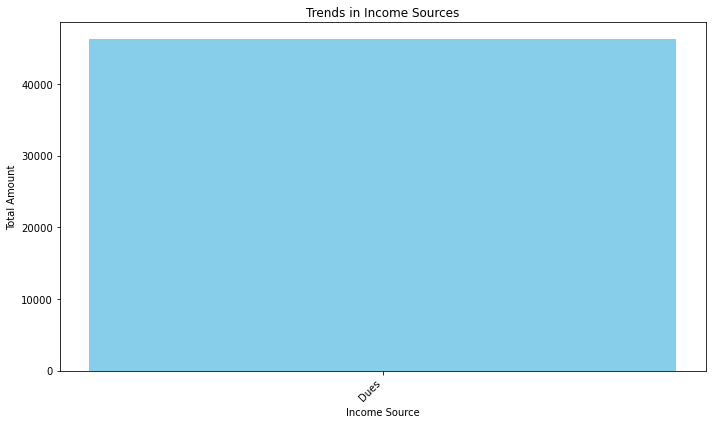

In [22]:
# Plot the trends
plt.figure(figsize=(10, 6))
plt.bar(income_trends['source'], income_trends['amount_x'], color='skyblue')
plt.xlabel('Income Source')
plt.ylabel('Total Amount')
plt.title('Trends in Income Sources')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
#Evaluate expense patterns related to different events
# Group the data by event name and sum the expenses
expense_patterns = merged_df.groupby('event_name')['cost'].sum().reset_index()

In [25]:
# Sort the events by total expenses in descending order
expense_patterns = expense_patterns.sort_values(by='cost', ascending=False)

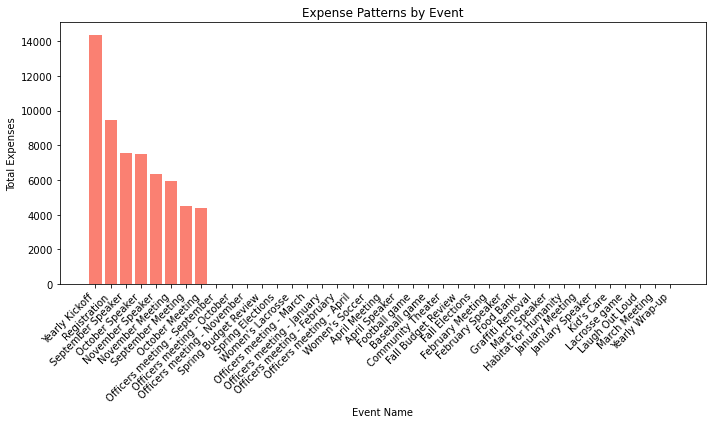

In [26]:
# Plot the expense patterns
plt.figure(figsize=(10, 6))
plt.bar(expense_patterns['event_name'], expense_patterns['cost'], color='salmon')
plt.xlabel('Event Name')
plt.ylabel('Total Expenses')
plt.title('Expense Patterns by Event')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
#Assess member participation in various events based on their major or location (zip code)
# Assess member participation based on major
major_participation = merged_df.groupby('major_name')['event_id'].count().reset_index()

In [28]:
# Sort the majors by participation count in descending order
major_participation = major_participation.sort_values(by='event_id', ascending=False)

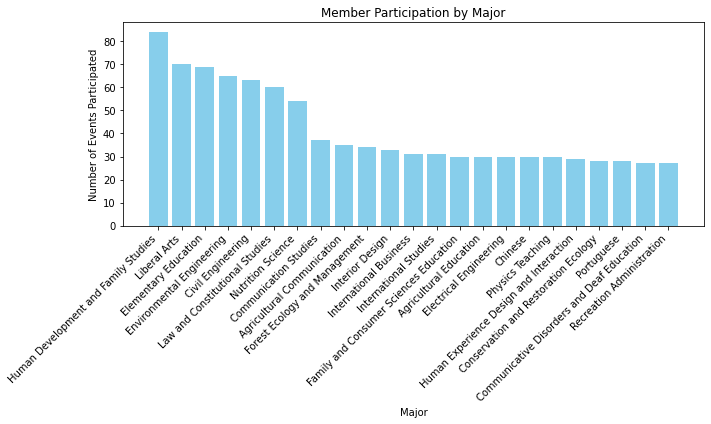

In [29]:
# Plot member participation based on major
plt.figure(figsize=(10, 6))
plt.bar(major_participation['major_name'], major_participation['event_id'], color='skyblue')
plt.xlabel('Major')
plt.ylabel('Number of Events Participated')
plt.title('Member Participation by Major')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Assess member participation based on location (zip code)
location_participation = merged_df.groupby('zip_code')['event_id'].count().reset_index()

In [32]:
# Sort the zip codes by participation count in descending order
location_participation = location_participation.sort_values(by='event_id', ascending=False)

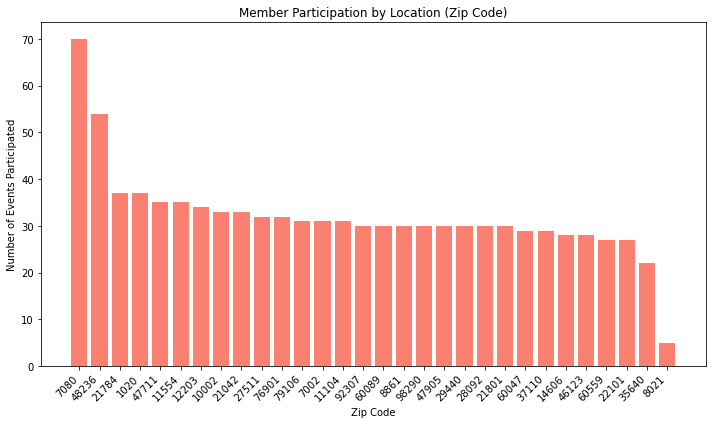

In [33]:
# Plot member participation based on location (zip code)
plt.figure(figsize=(10, 6))
plt.bar(location_participation['zip_code'], location_participation['event_id'], color='salmon')
plt.xlabel('Zip Code')
plt.ylabel('Number of Events Participated')
plt.title('Member Participation by Location (Zip Code)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
#Create visualisations to represent trends in income and expenses over time
# Convert date columns to datetime objects
merged_df['event_date'] = pd.to_datetime(merged_df['event_date'])
merged_df['date_received'] = pd.to_datetime(merged_df['date_received'])
merged_df['expense_date'] = pd.to_datetime(merged_df['expense_date'])

In [35]:
# Group income and expenses by date
income_over_time = merged_df.groupby(pd.Grouper(key='date_received', freq='M'))['amount_x'].sum()
expenses_over_time = merged_df.groupby(pd.Grouper(key='expense_date', freq='M'))['cost'].sum()

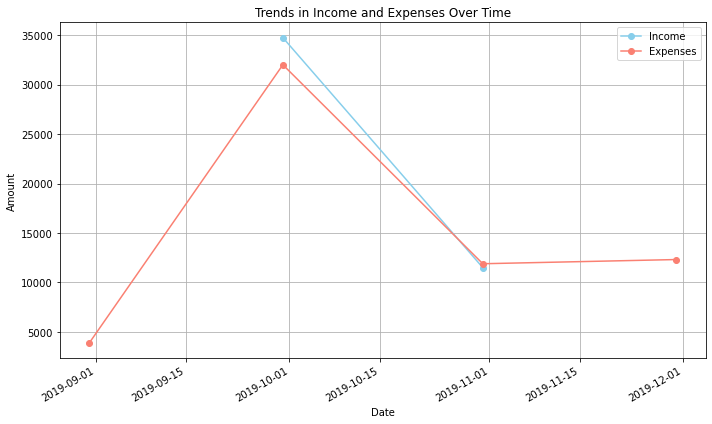

In [36]:
# Plot trends in income and expenses over time
plt.figure(figsize=(10, 6))
income_over_time.plot(label='Income', color='skyblue', linestyle='-', marker='o')
expenses_over_time.plot(label='Expenses', color='salmon', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Trends in Income and Expenses Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
#Visualise member attendance at various events by major or location (zip code)
# Assess member attendance based on major
major_attendance = merged_df.groupby('major_name')['event_id'].count().reset_index()

In [38]:
# Sort the majors by attendance count in descending order
major_attendance = major_attendance.sort_values(by='event_id', ascending=False)

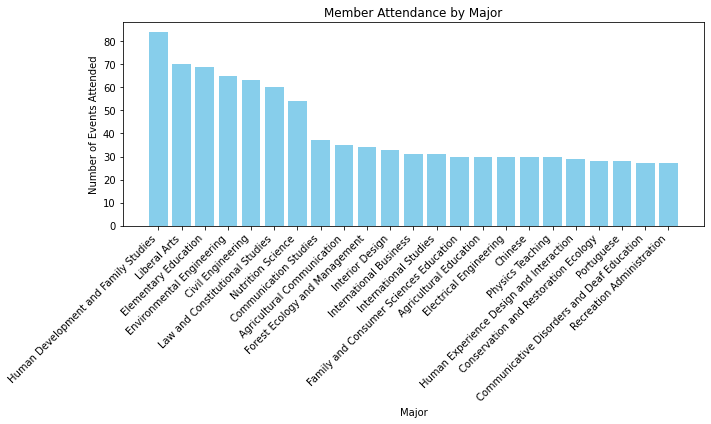

In [39]:
# Plot member attendance based on major
plt.figure(figsize=(10, 6))
plt.bar(major_attendance['major_name'], major_attendance['event_id'], color='skyblue')
plt.xlabel('Major')
plt.ylabel('Number of Events Attended')
plt.title('Member Attendance by Major')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Assess member attendance based on location (zip code)
location_attendance = merged_df.groupby('zip_code')['event_id'].count().reset_index()

In [41]:
# Sort the zip codes by attendance count in descending order
location_attendance = location_attendance.sort_values(by='event_id', ascending=False)

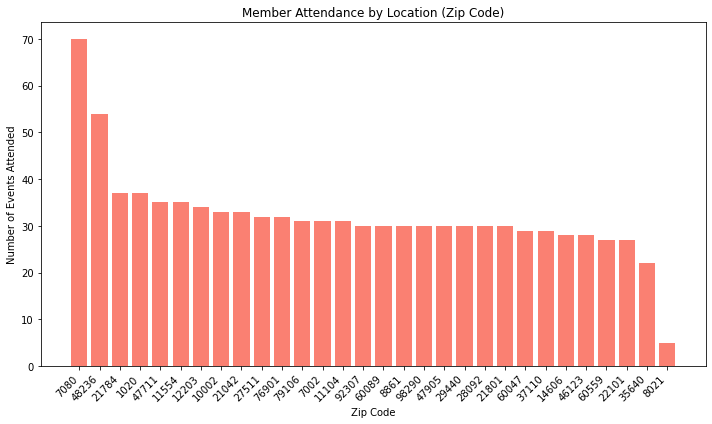

In [42]:
# Plot member attendance based on location (zip code)
plt.figure(figsize=(10, 6))
plt.bar(location_attendance['zip_code'], location_attendance['event_id'], color='salmon')
plt.xlabel('Zip Code')
plt.ylabel('Number of Events Attended')
plt.title('Member Attendance by Location (Zip Code)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
#Develop plots that highlight correlations between event budgets and actual expenses
# Filter out rows where both budget and actual expenses are available
filtered_data = merged_df.dropna(subset=['amount_y', 'cost'])

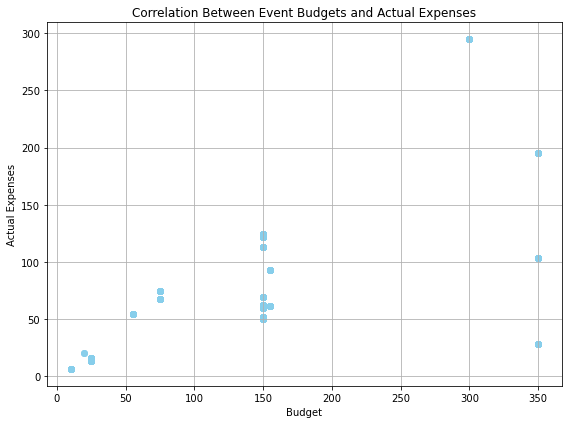

In [44]:
# Plot the correlation between event budgets and actual expenses
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['amount_y'], filtered_data['cost'], color='skyblue', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Actual Expenses')
plt.title('Correlation Between Event Budgets and Actual Expenses')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
#Time series plot of incomes and expenses
# Convert date columns to datetime objects
merged_df['date_received'] = pd.to_datetime(merged_df['date_received'])
merged_df['expense_date'] = pd.to_datetime(merged_df['expense_date'])

In [46]:
# Group incomes by date
income_timeseries = merged_df.groupby('date_received')['amount_x'].sum()

In [47]:
# Group expenses by date
expense_timeseries = merged_df.groupby('expense_date')['cost'].sum()

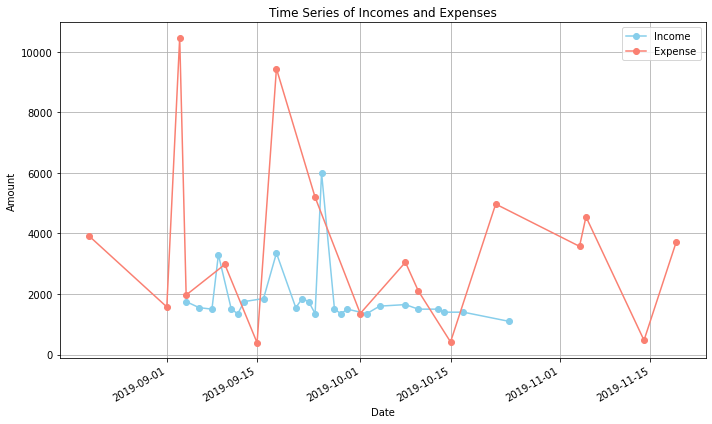

In [48]:
# Plot time series of incomes and expenses
plt.figure(figsize=(10, 6))
income_timeseries.plot(label='Income', color='skyblue', linestyle='-', marker='o')
expense_timeseries.plot(label='Expense', color='salmon', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Time Series of Incomes and Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
#Breakdown of event attendance by major
# Group event attendance by major
attendance_by_major = merged_df.groupby('major_name')['event_id'].count().reset_index()

In [50]:
# Sort the majors by event attendance count in descending order
attendance_by_major = attendance_by_major.sort_values(by='event_id', ascending=False)

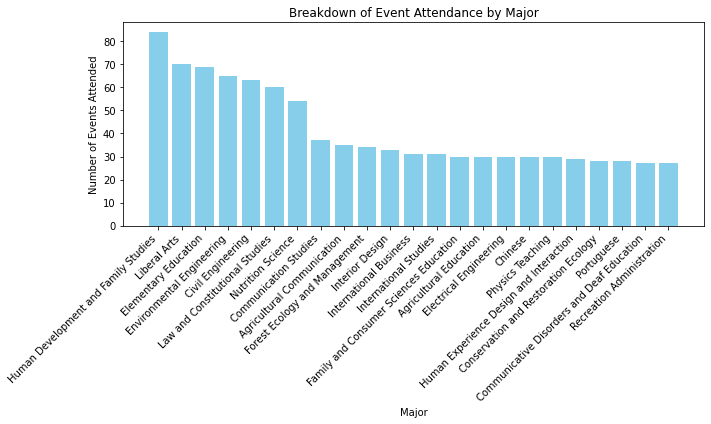

In [51]:
# Plot breakdown of event attendance by major
plt.figure(figsize=(10, 6))
plt.bar(attendance_by_major['major_name'], attendance_by_major['event_id'], color='skyblue')
plt.xlabel('Major')
plt.ylabel('Number of Events Attended')
plt.title('Breakdown of Event Attendance by Major')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
#A heatmap of budget vs actual expense for each event

# Filter out rows where both budget and actual expenses are available
filtered_data_1 = merged_df.dropna(subset=['amount_y', 'cost'])

In [54]:
# Pivot the data to create a matrix of budget vs. actual expense for each event
heatmap_data = filtered_data_1.pivot_table(index='event_name', columns='event_id', values=['amount_y', 'cost'])

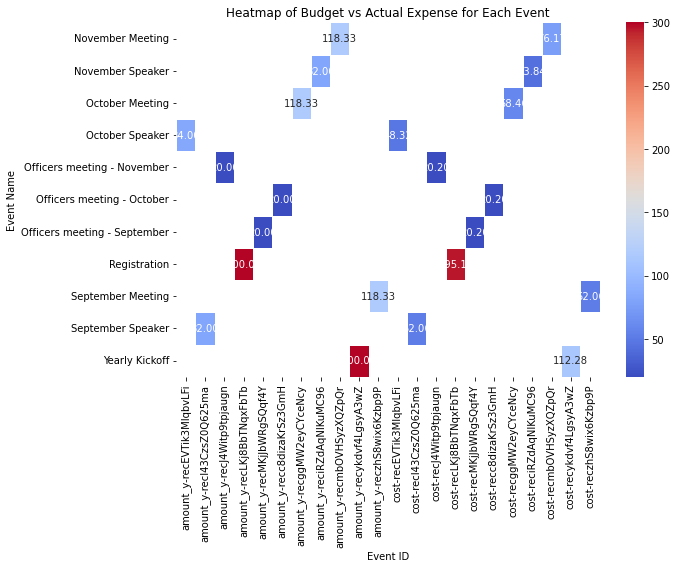

In [55]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Budget vs Actual Expense for Each Event')
plt.xlabel('Event ID')
plt.ylabel('Event Name')
plt.tight_layout()
plt.show()